# 3D Toric Code Sweep Decoder

In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pymatching import Matching
import os
from bn3d.bpauli import get_effective_error

from bn3d.analysis import get_results_df_from_batch, get_thresholds_df
from bn3d.plots._threshold import detailed_plot
from bn3d.config import ERROR_MODELS

from bn3d.app import (
    read_input_dict, run_once
)
from bn3d.io import (
    serialize_results, dump_results
)
from tqdm.notebook import tqdm
from bn3d.plots import plot_export_json
import IPython.display
import datetime
from bn3d.config import BN3D_DIR, BN3D_DARK_THEME
if BN3D_DARK_THEME:
    plt.style.use('dark_background')

import pandas as pd

In [4]:
# Parameters
# Change these as you wish.

input_data = {
    'comments': 'Simple Demonstration',
    'ranges': {
        'label': 'rotated-toric-04',
        'code': {
            'model': 'RotatedToricCode3D',
            'parameters': [
                {'L_x': 3, 'L_y': 4, 'L_z': 4},
                {'L_x': 4, 'L_y': 5, 'L_z': 5},
                {'L_x': 5, 'L_y': 6, 'L_z': 6},
            ]
        },
        'noise': {
            'model': 'DeformedXZZXErrorModel',
            'parameters': [
                {'r_x': 0, 'r_y': 0, 'r_z': 1}
            ],
        },
        'decoder': {
            'model': 'BeliefPropagationOSDDecoder',
            'parameters': [{'joschka': True}]
        },
        'probability': np.arange(0.01, 0.5, 0.01).round(5).tolist(),
    }
}

# Frequecy of plot update.
plot_frequency = 5

# Frequency of saving to file.
save_frequency = 20

# Target number of simulations.
n_trials = 200

In [5]:
batch_sim = read_input_dict(
    input_data,
    update_frequency=plot_frequency,
    save_frequency=save_frequency
)

In [6]:
def update_plot():
    """Plot routine on loop."""
    remaining_time = batch_sim.estimate_remaining_time(n_trials)
    df = pd.DataFrame(batch_sim.get_results())

    plt.clf()
    for code_size in df['size'].unique():
        df_filtered = df[df['size'] == code_size]
        plt.errorbar(
            df_filtered['probability'], df_filtered['p_est'],
            yerr=df_filtered['p_se'],
            label=f'L={code_size[0]}'
        )
    plt.title(f'Time remaining {datetime.timedelta(seconds=int(remaining_time))}')
    plt.xlabel('Physical Error Rate', fontsize=20)
    plt.ylabel('Logical Error Rate', fontsize=20)
    plt.legend()
    IPython.display.clear_output(wait=True)
    IPython.display.display(plt.gcf())

batch_sim.on_update = update_plot

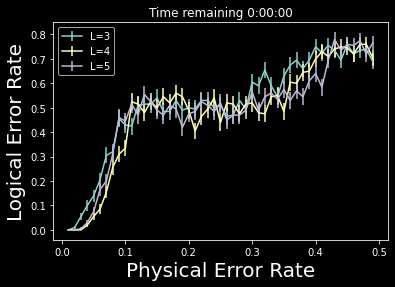

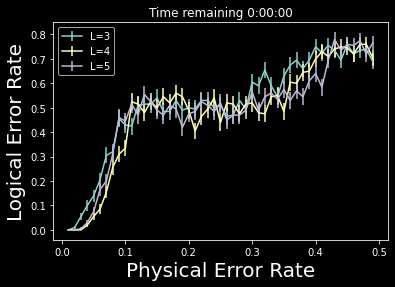

In [7]:
batch_sim._run(n_trials, progress=tqdm)

[0.2, 0.5]


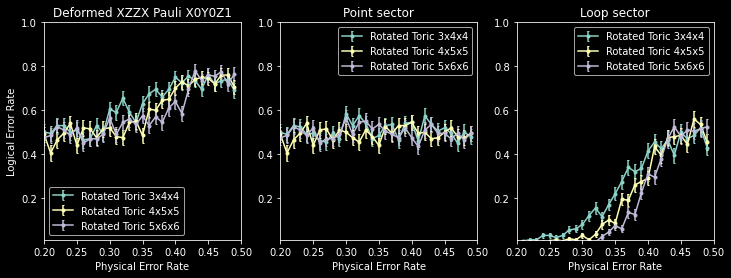

In [13]:
results_df = get_results_df_from_batch(batch_sim, input_data['ranges']['label'])
error_model = 'Deformed XZZX Pauli X0Y0Z1'
# xlim = (input_data['ranges']['probability'][0], input_data['ranges']['probability'][-1])
xlim=[0.2, 0.5]
print(xlim)
detailed_plot(plt, results_df, error_model, x_limits=[xlim, xlim, xlim])